In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

Simple Convolution layer

(1, 3, 3, 1)


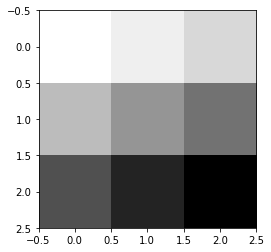

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3, 3), cmap='Greys')
plt.show()

- image : 1, 3, 3, 1
- Filter : 2, 2, 1, 1
- Stride : 1 X 1
- Padding: Valid
 

* image : 1개의 3 X 3 X 1의 이미지 (1,3,3,1) = (이미지갯수, 크기1,크기2, 색깔)
* Filter : 2 X 2 X 1 에 1개의 filter를 사용 (2,2,1,1) = (크기1, 크기2,, 색깔, 필터갯수)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[ 12.  16.]
 [ 24.  28.]]


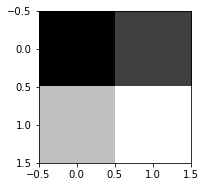

In [3]:
#print("imag \n", image)
print("image.shape", image.shape)
#Filter
weight = tf.constant([[[[1.0]], [[1.0]]],
                      [[[1.0]], [[1.0]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2, 2), cmap='gray')
    plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


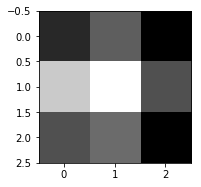

In [4]:
#print("imag \n", image)
print("image.shape", image.shape)
#Filter
weight = tf.constant([[[[1.0]], [[1.0]]],
                      [[[1.0]], [[1.0]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap='gray')
    plt.show()

### Filter 여러개

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


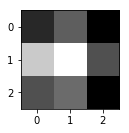

[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]


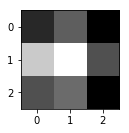

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


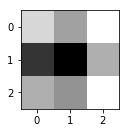

In [5]:
#print("imag \n", image)
print("image.shape", image.shape)
#Filter
weight = tf.constant([[[[1., 10., -1]], [[1., 10., -1]]],
                      [[[1., 10., -1]], [[1., 10., -1]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap='gray')
    plt.show()

# MAX Pooling

- Filter 된 이미지를 적당한 크기로 (아래에서는 2X2크기) 안에 있는 값중 가장 큰값으로 변환한다.

In [6]:
image = np.array([[[[4], [3]],
                   [[2], [1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize = [1, 2, 2, 1], strides = [1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


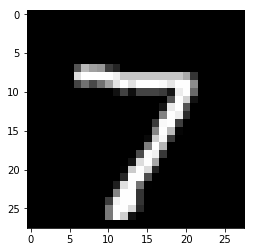

In [8]:

img = mnist.test.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

# MNIST Convolution layer

- Filter로 나오는 conv2d의 크기는 
- padding이 'valid'일떄는 (N- F)/strides + 1
- padding이 'SAME'일때는 N/stride

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


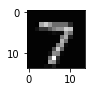

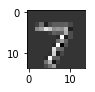

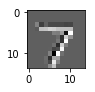

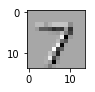

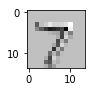

In [9]:
sess = tf.InteractiveSession()
img = mnist.test.images[0]
# 28 X 28의 1색깔 -1은 알아서 계산하라는 뜻
img = img.reshape(-1, 28, 28, 1)
# 3*3의 filter 5개 이용
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev = 0.01))

conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1)
    plt.imshow(one_img.reshape(14, 14), cmap='gray')
    plt.show()

# MNIST Max pooling

- conv2d 의 크기 14 * 14 
- ksize 2*2 
- strides 2
- 14/2 = 7  ---> 7*7 크기의 아웃풋

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


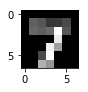

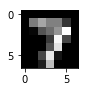

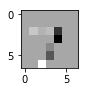

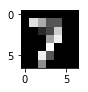

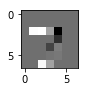

In [10]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)

for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1)
    plt.imshow(one_img.reshape(7, 7), cmap='gray')
    plt.show()

# MNIST

In [ ]:

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

#L1 image shape = (?, 28, 28, 1)
# filter 3*3 크리 1color 32개로 진행
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
# conv -> (?, 28, 28, 32)
# pool -> (?, 14, 14, 32)
L1_conv2d = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding = 'SAME')
L1 = tf.nn.relu(L1_conv2d)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

# L2 image shape = (?, 14, 14, 32)
W2= tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))
# conv -> (?, 14, 14, 64)
# pool -> (?, 7, 7, 64)

L2_conv2d = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
L2 = tf.nn.relu(L2_conv2d)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
# 이것을 Fully connected  layer에 넣기 위해서 reshpae를 통해 펼친다
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])
# 그리고 L2를 (?, 3136)으로 reshape

# final FC 7*7*64 inputs -> 10 output
W3 = tf.get_variable('W33', shape = [7 * 7 * 64, 10], initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)

predicted = tf.argmax(logits, 1)
is_correct = tf.equal(predicted, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, dtype = tf.float32))

training_epochs = 15
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("Learning Started, It takes times")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print('epoch : {}, cost ={:.9f}'.format(epoch + 1, avg_cost))
    
print("Learning Finished")

print("Accuracy : ", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    

Learning Started, It takes times
epoch : 1, cost =0.336670278
epoch : 2, cost =0.096485238
epoch : 3, cost =0.070345327
epoch : 4, cost =0.056363511
epoch : 5, cost =0.047143751
epoch : 6, cost =0.040687996
epoch : 7, cost =0.035179751
epoch : 8, cost =0.030787914
epoch : 9, cost =0.027468251
epoch : 10, cost =0.023977257
epoch : 11, cost =0.020785034
epoch : 12, cost =0.018512354
epoch : 13, cost =0.017214839
epoch : 14, cost =0.014740563
epoch : 15, cost =0.014031536
Learning Finished
Accuracy :  0.9901


# DEEP CONV in MNIST

In [34]:
X = tf.placeholder(tf.float32, shape = [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, shape = [None, 10])
#dropout
keep_prob = tf.placeholder(tf.float32)
#변수
learning_rate = 0.001

#첫번째 레이어 입력 그림 크기 [-1, 28, 28, 1]
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev = 0.01))

L1 = tf.nn.conv2d(X_img, W1, strides = [1, 1, 1, 1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

#두번째 레어이 입력 그림 크기 [-1, 14, 14, 32]
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))

L2 = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize =[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
L2 = tf.nn.dropout(L2, keep_prob = keep_prob)

#세번째 레이어 입력 그림 크기 [-1, 7, 7, 64]
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev = 0.01))

L3 = tf.nn.conv2d(L2, W3, strides = [1, 1, 1, 1], padding = 'SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
L3 = tf.nn.dropout(L3, keep_prob = keep_prob)

#펼치기
L3_flat = tf.reshape(L3, [-1, 4 * 4 * 128])

#네번째 레이어 여기서부터는 fully connected layer
W4 = tf.get_variable('W44dfsdfg444', shape = [4 * 4 * 128, 625], initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob = keep_prob)

#다섯번째 레이어 (output layer)
W5 = tf.get_variable('W555dfsdfg55', shape = [625, 10], initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

is_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 15
batch_size = 100
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob : 0.7}
        c, _= sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print('epoch : {}, cost ={:.9f}'.format(epoch + 1, avg_cost))
    
print("Learning Finished")

print("Accuracy : ", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

epoch : 1, cost =0.434584659


KeyboardInterrupt: 

# 깔끔하게 클래스로 정리해보자

In [46]:
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()
        
    def _build_net(self):
        with tf.variable_scope(self.name):
            #input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])
            # img 28X28X1 (black/white)
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])
            self.keep_prob = tf.placeholder(tf.float32)
            #L1 image shape = (-1, 28, 28 , 1)
            #filter 3X3, 32개
            W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
            L1 = tf.nn.conv2d(X_img, W1, strides = [1, 1, 1, 1], padding = 'SAME')
            L1 = tf.nn.relu(L1)
            L1 = tf.nn.max_pool(L1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
            L1 = tf.nn.dropout(L1, self.keep_prob)
            
            W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))
            L2 = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
            L2 = tf.nn.relu(L2)
            L2 = tf.nn.max_pool(L2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
            L2 = tf.nn.dropout(L2, self.keep_prob)
            L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])
            
            W3 = tf.get_variable('W333222133', shape = [7 * 7 * 64, 10], initializer = tf.contrib.layers.xavier_initializer())
            b3 = tf.Variable(tf.random_normal([10]))
            self.hypothesis = tf.matmul(L2_flat, W3) + b3
            
            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = self.hypothesis, labels = self.Y))
            self.optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(self.cost)
            
            is_corrrct = tf.equal(tf.argmax(self.hypothesis, 1), tf.argmax(self.Y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

    def predict(self, x_test, keep_prop = 1.0):
        return self.sess.run(self.hypothesis, feed_dict = {self.X: x_test, self.keep_prob : keep_prop})
    
    def get_accuracy(self, x_test, y_test, keep_prop = 1.0):
        return self.sess.run(self.accuracy, feed_dict = {self.X: x_test, self.Y: y_test, self.keep_prob: keep_prop})
    
    def train(self, x_data, y_data, keep_prop = 0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict = {self.X: x_data, self.Y: y_data, self.keep_prob: keep_prop})
    
sess = tf.Session()
m1 = Model(sess, "m1")
sess.run(tf.global_variables_initializer())

print("Learning Started")
batch_size = 100
training_epochs = 15

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))
        avg_cost = c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))


Learning Started
Epoch: 0001 cost = 0.000393160
Epoch: 0002 cost = 0.000118439
Epoch: 0003 cost = 0.000128507
Epoch: 0004 cost = 0.000111209
Epoch: 0005 cost = 0.000298314
Epoch: 0006 cost = 0.000123257
Epoch: 0007 cost = 0.000104389
Epoch: 0008 cost = 0.000108707
Epoch: 0009 cost = 0.000036123
Epoch: 0010 cost = 0.000067946
Epoch: 0011 cost = 0.000077932
Epoch: 0012 cost = 0.000004117
Epoch: 0013 cost = 0.000045550
Epoch: 0014 cost = 0.000045605
Epoch: 0015 cost = 0.000006545
Learning Finished!


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_84' with dtype float and shape [?,784]
	 [[Node: Placeholder_84 = Placeholder[dtype=DT_FLOAT, shape=[?,784], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_84', defined at:
  File "C:\Users\POWER USER\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\POWER USER\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-7893d17f5775>", line 1, in <module>
    X = tf.placeholder(tf.float32, shape = [None, 784])
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\POWER USER\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_84' with dtype float and shape [?,784]
	 [[Node: Placeholder_84 = Placeholder[dtype=DT_FLOAT, shape=[?,784], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
import tensorflow as tf
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100


class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.keep_prob = tf.placeholder(tf.float32)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])
            # img 28x28x1 (black/white)
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # L1 ImgIn shape=(?, 28, 28, 1)
            W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
            #    Conv     -> (?, 28, 28, 32)
            #    Pool     -> (?, 14, 14, 32)
            L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
            L1 = tf.nn.relu(L1)
            L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob)
            '''
            Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
            Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
            Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
            Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
            '''

            # L2 ImgIn shape=(?, 14, 14, 32)
            W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            #    Conv      ->(?, 14, 14, 64)
            #    Pool      ->(?, 7, 7, 64)
            L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
            L2 = tf.nn.relu(L2)
            L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L2 = tf.nn.dropout(L2, keep_prob=self.keep_prob)
            '''
            Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
            Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
            Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
            Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
            '''

            # L3 ImgIn shape=(?, 7, 7, 64)
            W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
            #    Conv      ->(?, 7, 7, 128)
            #    Pool      ->(?, 4, 4, 128)
            #    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
            L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
            L3 = tf.nn.relu(L3)
            L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                                1, 2, 2, 1], padding='SAME')
            L3 = tf.nn.dropout(L3, keep_prob=self.keep_prob)

            L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
            '''
            Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
            Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
            Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
            Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
            Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
            '''

            # L4 FC 4x4x128 inputs -> 625 outputs
            W4 = tf.get_variable("W123254646514", shape=[128 * 4 * 4, 625],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b4 = tf.Variable(tf.random_normal([625]))
            L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
            L4 = tf.nn.dropout(L4, keep_prob=self.keep_prob)
            '''
            Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
            Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
            '''

            # L5 Final FC 625 inputs -> 10 outputs
            W5 = tf.get_variable("W11321654456", shape=[625, 10],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b5 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(L4, W5) + b5
            '''
            Tensor("add_1:0", shape=(?, 10), dtype=float32)
            '''

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, keep_prop=1.0):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.keep_prob: keep_prop})

    def get_accuracy(self, x_test, y_test, keep_prop=1.0):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.keep_prob: keep_prop})

    def train(self, x_data, y_data, keep_prop=0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.keep_prob: keep_prop})

# initialize
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

print('Learning Started!')

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning Started!
Epoch: 0001 cost = 0.381203758
Epoch: 0002 cost = 0.092832897
Epoch: 0003 cost = 0.070447051
Epoch: 0004 cost = 0.056796042
Epoch: 0005 cost = 0.049129266
Epoch: 0006 cost = 0.046718946
Epoch: 0007 cost = 0.041865470
Epoch: 0008 cost = 0.038871896
Epoch: 0009 cost = 0.036591671


# tf.layers 사용 하기

In [ ]:
X = tf.placeholder(tf.float32, shape = [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, shape = [None, 10])
#dropout
keep_prob = tf.placeholder(tf.float32)
#변수
learning_rate = 0.001

#첫번째 레이어 입력 그림 크기 [-1, 28, 28, 1]
#W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev = 0.35))

#L1 = tf.nn.conv2d(X_img, W1, strides = [1, 1, 1, 1], padding = 'SAME')
#L1 = tf.nn.relu(L1)
#L1 = tf.nn.max_pool(L1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
#L1 = tf.nn.dropout(L1, keep_prob)

conv1 = tf.layers.conv2d(inputs=X_img, filters = 32, kernel_size=[3, 3], padding ='SAME', activation=tf.nn.relu)
pool1 =tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], padding='SAME', strides=2)
dropout1 = tf.layers.dropout(inputs=pool1, rate=0.7, training=self.training)

#두번째 레어이 입력 그림 크기 [-1, 14, 14, 32]
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.35))

L2 = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize =[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
L2 = tf.nn.dropout(L2, keep_prob)

#세번째 레이어 입력 그림 크기 [-1, 7, 7, 64]
#W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev = 0.35))

#L3 = tf.nn.conv2d(L2, W3, strides = [1, 1, 1, 1], padding = 'SAME')
#L3 = tf.nn.relu(L3)
#L3 = tf.nn.max_pool(L3, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
#L3 = tf.nn.dropout(L3, keep_prob)

#펼치기
#L3 = tf.reshape(L3, [-1, 4 * 4 * 128])
conv3 = tf.layers.conv2d(inputs=L2, filters = 128, kernal_size=[3, 3], padding = 'SAME', activation = tf.nn.relu)
pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2,2], padding='SAME', strides=2)
dropout3 = tf.layers.dropout(inputs=pool3, rate=0.7, training=self.training)
flat = tf.reshape(dropout3, [-1, 128 * 4 *4])

#아래에 있는 4번째레이어를 이와같이 매우 간단하게 표현 가능
dense4 = tf.layers.dense(input=flat, units=625, activation=tf.nn.relu)
dropout4 = tf.layers.dropout(inputs=dense4, rate=0.7, training=self.training)

#네번째 레이어 여기서부터는 fully connected layer
# = tf.get_variable('W444444444', shape = [4 * 4 * 128, 512], initializer = tf.contrib.layers.xavier_initializer())
#b4 = tf.Variable(tf.random_normal([512]))
#L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
#L4 = tf.nn.dropout(L4, keep_prob)


#다섯번째 레이어 (output layer)
W5 = tf.get_variable('W55555555', shape = [512, 10], initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))
optimizer = tf.train.AdagradOptimizer(learning_rate = learning_rate).minimize(cost)

is_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 15
batch_size = 100
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob : 0.7}
        c, _= sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print('epoch : {}, cost ={:.9f}'.format(epoch + 1, avg_cost))
    
print("Learning Finished")

print("Accuracy : ", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# EMSAMBLE 기법

In [ ]:
models = []
num_models = 7
sess = tf.Session()
for m in range(num_models):
    models.append(Model(sess, "model" + str(m)))
sess.run(tf.global_variables_initializer())
print('Learning Started')

for epoch inrange(training_epochs):
    avg_cost_list = np.zeros(len(models))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch
    print('Epochs: {}, cost = {}'.format(epoch + 1, avg_cost_list))

# emsamble prediction
- 다양한 기법 존재 
- 여기서는 결과들을 단순히 합하여 argmax로 점수가 가장 높은 것을 결과로 잡는다

In [ ]:
test_size = len(mnist.test.labels)
predictions = np.zeros(test_size * 10).reshape(test_size, 10)

for m_idx, m in enumerate(models):
    print(m_idx, 'Accuracy:', m.get_accuracy(mnist.test.images, mnist.test.labels))
    o = m.predict(mnist.test.images)
    predictions += p

emsemble_correct_prediction tf.equal(tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
emsemble_accuracy = tf.reducemean(tf.cast(emsemble_correct_prediction, tf.float32))
print("앙상블 정확도 : {}".format(emsemble_accuracy))
